In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
 
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import objdet.object_detector
import sklearn.base as be
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier


import warnings
warnings.filterwarnings('ignore')

C:\Users\Maria\Miniconda3\envs\objdet\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def load_dataset(n_samples=40):
    download_dir = r"C:\Users\Maria\Documents\TU Delft\Medical Visualization\Proyecto Clinical Graphics\Object_Detection_in_Medical_Images-2015-11-17\Object Detection in Medical Images\Images"
    boxes = np.load(os.path.join(download_dir, "boxes.npy"))[:n_samples]
    images = []
    for i in range(n_samples):
        image = np.load(os.path.join(download_dir, "image{0:03d}.npy".format(i)))
        images.append(image)
    return boxes, images
boxes, images = load_dataset()

In [48]:
boxes2 = np.asanyarray(boxes)
newbox=boxes[1]

A_x_min, A_y_min = newbox.min(axis=0)
A_x_max, A_y_max = newbox.max(axis=0)
w=A_x_max-A_x_min
h=A_y_max-A_y_min

print('width, height')
print(w,h)

width, height
1203.63661589 1184.3506076


In [3]:
for i, (box, img) in enumerate(zip(boxes, images)):
    # plot image, contour and normal points
    #fig, ax = plt.subplots()
    #fig.suptitle("image {}".format(i))
    #ax.imshow(img.T, cmap=matplotlib.cm.gray)
    #ax.plot(box[:, 0], box[:, 1], "-")
    #ax.set_aspect('equal')
    
    if i == 5:  # use this to stop plotting after the i -th image, or remove to plot all images
        break


In [260]:
# OBJECT DETECTOR IMPLEMENTING NMS AND COMPARING DIFFERENT CLASSIFIERS AGAINS VALUE OF OVERLAP THRESHOLD

select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]
 
compare=1

if compare:
    #test_cls=['RandomForest_1','RandomForest_3','RandomForest_5','RandomForest_10', 'RandomForest_20']
    test_cls=['RandomForest_1','RandomForest_3','RandomForest_5','RandomForest_10', 'RandomForest_20','RandomForest_30']
    test_overlap_threshold_nms=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9]
    scores_nms_per_cls=np.zeros((9,len(test_cls)))
    scores_prob_per_cls=np.zeros((9,len(test_cls)))
    mean_scores_nms=[]
    mean_scores_prob=[]
    for index,clsf in enumerate(test_cls):
        print('classifier=')
        print(clsf)
        for thr in test_overlap_threshold_nms:
            #print('thr value=')
            #print(thr)
            detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                                scale_fraction=0.0625, 
                                                                overlap_threshold_original=0.6,
                                                                orientations=9, pixels_per_cell=(32, 32), 
                                                                cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                                overlap_threshold_nms=thr,
                                                                clasfr=clsf)
            detector.fit(train_images, train_boxes, debug=False)
            predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
            mean_score_prob,mean_score_nms = detector.mean_score(test_images, test_boxes,
                                                            predicted_boxes_prob, predicted_boxes_nms, debug=False)
            mean_scores_nms.append(mean_score_nms)
            mean_scores_prob.append(mean_score_prob)
        scores_nms_per_cls[:,index]=mean_scores_nms
        scores_prob_per_cls[:,index]=mean_scores_prob
        mean_scores_nms=[]
        mean_scores_prob=[]
    print(scores_nms_per_cls)
    print(scores_prob_per_cls)
    print('********END OF PROGRAM********')
    print(test_cls)
                
                
if compare==0:
    detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                        scale_fraction=0.0625, 
                                                        overlap_threshold_original=0.6,
                                                        orientations=9, pixels_per_cell=(32, 32), 
                                                        cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                        overlap_threshold_nms=0.4,
                                                        clasfr='SVC_C0025_linear')

# Possible classifiers:
# clasfr= 'RandomForest'
# clasfr= 'KNeighborsClassifier'
# clasfr= 'SVC'

# clasfr= 'AdaBoostClassifier'
# clasfr= 'DecisionTreeClassifier'  
# clasfr= 'SVC_linear'
# clasfr= 'SVC_C0025_linear'
# clasfr= 'GaussianNB'
# clasfr= 'LinearDiscriminantAnalysis'
# clasfr= 'QuadraticDiscriminantAnalysis'


    detector.fit(train_images, train_boxes, debug=False)
    predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
    mean_score_prob,mean_score_nms = detector.mean_score(test_images, test_boxes, predicted_boxes_prob, predicted_boxes_nms, debug=False)
   
    print(predicted_boxes_prob)
    #print('mean_score_nms=', mean_score_nms)


classifier=
RandomForest_1
classifier=
RandomForest_3
classifier=
RandomForest_5
classifier=
RandomForest_10
classifier=
RandomForest_20
classifier=
RandomForest_30
[[ 0.17111274  0.45005007  0.51083936  0.56235851  0.60592087  0.60680291]
 [ 0.24851893  0.45094547  0.58016762  0.53552279  0.60501895  0.59073813]
 [ 0.13947914  0.58586199  0.53483234  0.5861361   0.59176157  0.59497392]
 [ 0.30149499  0.58129078  0.50520178  0.55043245  0.59351281  0.58854221]
 [ 0.21725853  0.36681251  0.57738344  0.53263904  0.60225487  0.59282363]
 [ 0.27093348  0.45220534  0.55229871  0.53615374  0.58942531  0.59438935]
 [ 0.26339448  0.30550433  0.54538635  0.57674087  0.59662882  0.58743683]
 [ 0.29841669  0.45983171  0.60040624  0.55107044  0.58547468  0.59008779]
 [ 0.3949878   0.51507524  0.55209012  0.60680291  0.56801525  0.59916631]]
[[ 0.2679071   0.45866346  0.58677669  0.56235851  0.60592087  0.60680291]
 [ 0.43153249  0.45094547  0.58466708  0.53552279  0.60501895  0.59073813]
 [ 0.1637

In [262]:
my_score_matrix_nms=scores_nms_per_cls
my_score_matrix_prob=scores_prob_per_cls

my_score_matrix=scores_nms_per_cls

In [79]:

print('my_score_matrix_nms')
print(my_score_matrix_nms)
print('my_score_matrix_prob')
print(my_score_matrix_prob)

my_score_matrix_nms
[[ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.56369678  0.5515432   0.60680291  0.60004835
   0.45302375  0.55629491  0.          0.23374341  0.47072892  0.53267735
   0.58863124  0.55896419]
 [ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.55953549  0.57353583  0.60004835  0.60004835
   0.27728719  0.55629491  0.          0.32106783  0.54852867  0.50166085
   0.59111094  0.60501895]
 [ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.49242707  0.55953549  0.60004835  0.60004835
   0.4903744   0.55629491  0.          0.35136665  0.33640798  0.55002418
   0.53729938  0.59350221]
 [ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.5515432   0.55953549  0.60004835  0.60004835
   0.41215466  0.55629491  0.          0.4296376   0.46359905  0.5081351
   0.5993599

<IPython.core.display.Javascript object>


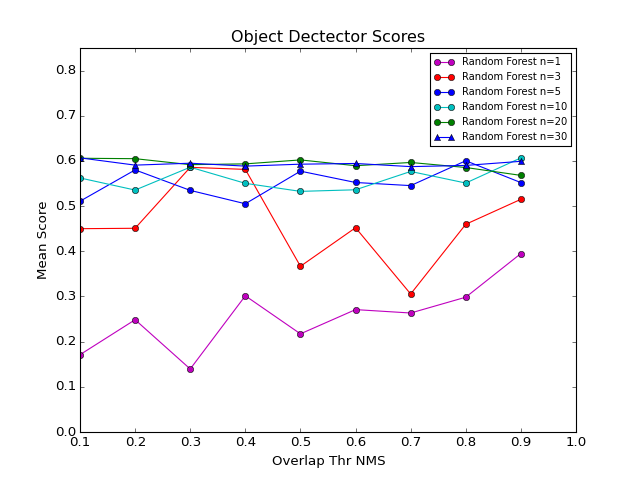

In [263]:
# PRINT SCORES OF DIFFERENT CLASSIFIERS
import pylab as pl


y1=my_score_matrix[:,0] # RandomForest classifier
y2=my_score_matrix[:,1] # KNeighbours clasf.
y3=my_score_matrix[:,2] # SVC clasf.
y4=my_score_matrix[:,3] # AdaBoost clasf.
y5=my_score_matrix[:,4] # GaussianNB clasf.
y6=my_score_matrix[:,5] # GaussianNB clasf.
#y7=my_score_matrix[:,6] # GaussianNB clasf.
#y8=my_score_matrix[:,7] # GaussianNB clasf.
# y9=my_score_matrix[:,8] # GaussianNB clasf.
# y10=my_score_matrix[:,9] # GaussianNB clasf.
x=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9] # NMS overlap thrs



    
fig, axs = plt.subplots()
# linear
# axs.scatter(x, y1,marker='o',label='RandomForest CLSF')
pl.plot(x, y1, 'm-o',label='Random Forest n=1')
pl.plot(x, y2, 'r-o',label='Random Forest n=3')
pl.plot(x, y3, 'b-o',label='Random Forest n=5')
pl.plot(x, y4, 'c-o',label='Random Forest n=10')
pl.plot(x, y5, 'g-o',label='Random Forest n=20')
pl.plot(x, y6, 'b-^',label='Random Forest n=30')
#pl.plot(x, y7, 'm-^',label='K Neighbors k=30')
#pl.plot(x, y8, 'g-^',label='K Neighbors k=35')
#pl.plot(x, y9, 'c-^',label='SVC C=0.025 linear')
#pl.plot(x, y10, 'k-^',label='Decision Tree')



pl.xlabel('Overlap Thr NMS')
pl.ylabel('Mean Score')
pl.title('Object Dectector Scores')
pl.ylim(0, 0.85)
pl.legend(loc=1, prop={"size":9})


In [31]:
# OBJECT DETECTOR USING K NEIGHBORS WITH DIFFERENT K VALUES

select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]
 

test_cls=['KNeighborsClassifier_k1','KNeighborsClassifier_k5','KNeighborsClassifier_k10','KNeighborsClassifier_k12',
          'KNeighborsClassifier_k15','KNeighborsClassifier_k20','KNeighborsClassifier_k24','KNeighborsClassifier_k25',
          'KNeighborsClassifier_k30','KNeighborsClassifier_k35','KNeighborsClassifier_k40','KNeighborsClassifier_k45',
          'KNeighborsClassifier_k50']

K_values=[1, 5, 10, 12, 15, 20, 24, 25, 30 ,35,40,45,50]
scores_per_k=np.zeros((9,len(test_cls)))
mean_scores=[]
for index,clsf in enumerate(test_cls):
    print('Clasfr:')
    print(clsf)
    detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                        scale_fraction=0.0625, 
                                                        overlap_threshold_original=0.6,
                                                        orientations=9, pixels_per_cell=(32, 32), 
                                                        cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                        overlap_threshold_nms=0.6,
                                                        clasfr=clsf)
    detector.fit(train_images, train_boxes, debug=False)
    predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
    mean_score_prob,mean_score_nms = detector.mean_score(test_images, test_boxes,
                                                    predicted_boxes_prob, predicted_boxes_nms, debug=False)
    mean_scores.append(mean_score_nms)


print(mean_scores)
print('********END OF PROGRAM********')

print('Maximum score value for K= ')
K_values[mean_scores.index(max(mean_scores))]


Clasfr:
KNeighborsClassifier_k1
Clasfr:
KNeighborsClassifier_k5
Clasfr:
KNeighborsClassifier_k10
Clasfr:
KNeighborsClassifier_k12
Clasfr:
KNeighborsClassifier_k15
Clasfr:
KNeighborsClassifier_k20
Clasfr:
KNeighborsClassifier_k24
Clasfr:
KNeighborsClassifier_k25
Clasfr:
KNeighborsClassifier_k30
Clasfr:
KNeighborsClassifier_k35
Clasfr:
KNeighborsClassifier_k40
Clasfr:
KNeighborsClassifier_k45
Clasfr:
KNeighborsClassifier_k50
[0.33737008226992748, 0.5378158150614859, 0.58021163964852462, 0.58591070478562435, 0.58591070478562435, 0.58606454528030782, 0.59149686334359852, 0.59149686334359852, 0.60702624886550727, 0.60680291023845345, 0.60680291023845345, 0.60151161986578261, 0.59607930180249191]
********END OF PROGRAM********


<IPython.core.display.Javascript object>


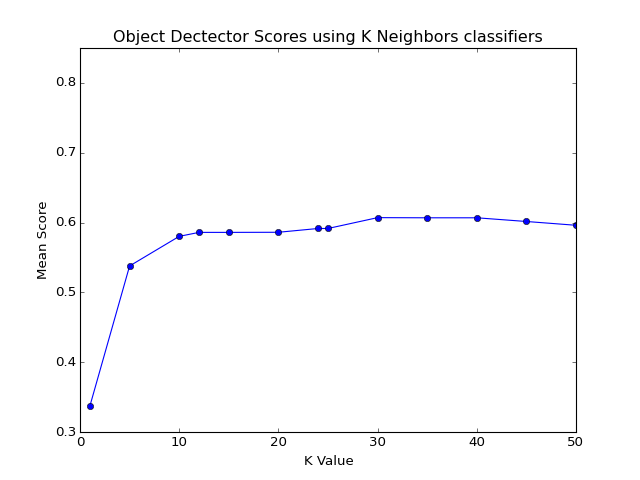

(0.3, 0.85)

In [32]:
import pylab as pl


y=mean_scores# RandomForest classifier
x=K_values # NMS overlap thrs
    
fig, axs = plt.subplots()
# linear
# axs.scatter(x, y1,marker='o',label='RandomForest CLSF')
pl.plot(x, y, 'b-o')
#pl.plot(x, y2, 'r-o',label='K Neighbors k=5')
#pl.plot(x, y3, 'b-o',label='K Neighbors k=10')
#pl.plot(x, y4, 'c-o',label='K Neighbors k=12')
#pl.plot(x, y5, 'g-o',label='K Neighbors k=20')
#pl.plot(x, y6, 'b-^',label='K Neighbors k=24')
#pl.plot(x, y7, 'm-^',label='K Neighbors k=30')
#pl.plot(x, y8, 'g-^',label='K Neighbors k=35')
#pl.plot(x, y9, 'c-^',label='SVC C=0.025 linear')
#pl.plot(x, y10, 'k-^',label='Decision Tree')

pl.xlabel('K Value')
pl.ylabel('Mean Score')
pl.title('Object Dectector Scores using K Neighbors classifiers')
pl.ylim(0.3, 0.85)
#pl.legend(loc=1, prop={"size":9})


In [265]:
# OBJECT DETECTOR COMPARING SCORES WITH DIFFERENT CLASSIFIERS AGAINS STEP_SIZES

select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]
 
compare=1

if compare:
    #test_cls=['RandomForest_1','RandomForest_3','RandomForest_5','RandomForest_10', 'RandomForest_20']
    test_cls=['KNeighborsClassifier_k1','KNeighborsClassifier_k5','KNeighborsClassifier_k10',
              'KNeighborsClassifier_k15','KNeighborsClassifier_k20',
              'KNeighborsClassifier_k30','KNeighborsClassifier_k50','SVC_C1_rbf','SVC_C0025_linear',
              'SVC_C1_linear','SVC_C2_linear', 'SVC_d2_poly','SVC_d3_poly','SVC_sigmoid',
              'RandomForest_1','RandomForest_3','RandomForest_5','RandomForest_10', 'RandomForest_20','RandomForest_30']
    step_sizes=[2,5,10]
    scores_per_cls_nms=np.zeros((3,len(test_cls)))
    scores_per_cls_prob=np.zeros((3,len(test_cls)))
    mean_scores_nms=[]
    mean_scores_prob=[]
    for index,clsf in enumerate(test_cls):
        print('classifier=')
        print(clsf)
        for step in step_sizes:
            #print('thr value=')
            #print(thr)
            detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=step, 
                                                                scale_fraction=0.0625,  
                                                                overlap_threshold_original=0.6, 
                                                                orientations=9, pixels_per_cell=(32, 32),  
                                                                cells_per_block=(3, 3), probability_thr_nms=0.6,  
                                                                overlap_threshold_nms=0.6, 
                                                                clasfr=clsf)
            detector.fit(train_images, train_boxes, debug=False)
            predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
            mean_score_prob,mean_score_nms = detector.mean_score(test_images, test_boxes,
                                                            predicted_boxes_prob, predicted_boxes_nms, debug=False)
            mean_scores_nms.append(mean_score_nms)
            mean_scores_prob.append(mean_score_prob)
        scores_per_cls_nms[:,index]=mean_scores_nms
        scores_per_cls_prob[:,index]=mean_scores_prob
        mean_scores_nms=[]
        mean_scores_prob=[]
    print('scores_per_cls_nms=')
    print(scores_per_cls_nms)
    print('scores_per_cls_prob=')
    print(scores_per_cls_prob)
    print('********END OF PROGRAM********')
                
                
if compare==0:
    detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                        scale_fraction=0.0625, 
                                                        overlap_threshold_original=0.6,
                                                        orientations=9, pixels_per_cell=(32, 32), 
                                                        cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                        overlap_threshold_nms=0.4,
                                                        clasfr='SVC_C0025_linear')


    detector.fit(train_images, train_boxes, debug=False)
    predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
    mean_score_prob = detector.score(test_images, test_boxes,predicted_boxes_prob, predicted_boxes_nms, debug=False)
   
    print(mean_score_prob)
    #print('mean_score_nms=', mean_score_nms)




classifier=
KNeighborsClassifier_k1
classifier=
KNeighborsClassifier_k5
classifier=
KNeighborsClassifier_k10
classifier=
KNeighborsClassifier_k15
classifier=
KNeighborsClassifier_k20
classifier=
KNeighborsClassifier_k30
classifier=
KNeighborsClassifier_k50
classifier=
SVC_C1_rbf
classifier=
SVC_C0025_linear
classifier=
SVC_C1_linear
classifier=
SVC_C2_linear
classifier=
SVC_d2_poly
classifier=
SVC_d3_poly
classifier=
SVC_sigmoid
classifier=
RandomForest_1
classifier=
RandomForest_3
classifier=
RandomForest_5
classifier=
RandomForest_10
classifier=
RandomForest_20
classifier=
RandomForest_30
scores_per_cls_nms=
[[ 0.47453661  0.45291091  0.4943792   0.4868804   0.49361804  0.50637757
   0.5222742   0.43873178  0.48027833  0.60282856  0.60282856  0.24333916
   0.55651116  0.          0.35169036  0.5291138   0.56823524  0.59026443
   0.59663315  0.6068805 ]
 [ 0.43622989  0.47979826  0.51014308  0.53142769  0.53503827  0.56225822
   0.59009646  0.32161507  0.35357573  0.5457461   0.545746

In [273]:
my_score_matrix_prob=scores_per_cls_prob
my_score_matrix_nms=scores_per_cls_nms

max(my_score_matrix_nms[1])



0.60702624886550727

<IPython.core.display.Javascript object>


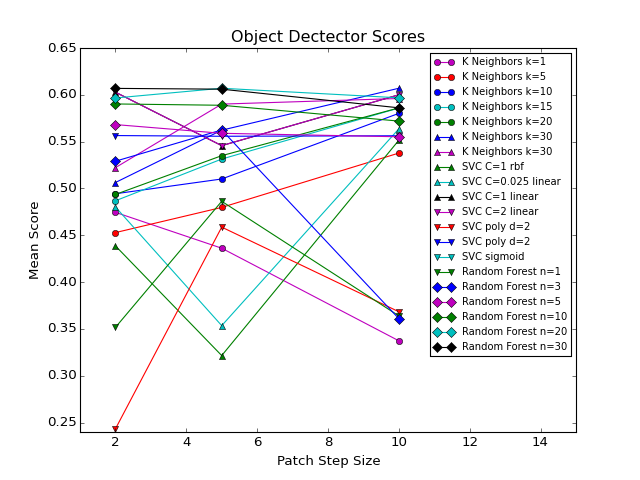

[ 0.5222742   0.59009646  0.5960793 ]


In [268]:
# PRINT SCORES OF DIFFERENT CLASSIFIERS
import pylab as pl

y1=my_score_matrix_nms[:,0] # RandomForest classifier
y2=my_score_matrix_nms[:,1] # KNeighbours clasf.
y3=my_score_matrix_nms[:,2] # SVC clasf.
y4=my_score_matrix_nms[:,3] # AdaBoost clasf.
y5=my_score_matrix_nms[:,4] # GaussianNB clasf.
y6=my_score_matrix_nms[:,5] # GaussianNB clasf.
y7=my_score_matrix_nms[:,6] # GaussianNB clasf.
y8=my_score_matrix_nms[:,7] # GaussianNB clasf.
y9=my_score_matrix_nms[:,8] # GaussianNB clasf.
y10=my_score_matrix_nms[:,9] # GaussianNB clasf.
y11=my_score_matrix_nms[:,10] # RandomForest classifier
y12=my_score_matrix_nms[:,11] # KNeighbours clasf.
y13=my_score_matrix_nms[:,12] # SVC clasf.
y14=my_score_matrix_nms[:,13] # AdaBoost clasf.
y15=my_score_matrix_nms[:,14] # GaussianNB clasf.
y16=my_score_matrix_nms[:,15] # GaussianNB clasf.
y17=my_score_matrix_nms[:,16] # GaussianNB clasf.
y18=my_score_matrix_nms[:,17] # GaussianNB clasf.
y19=my_score_matrix_nms[:,18] # GaussianNB clasf.
y20=my_score_matrix_nms[:,19] # GaussianNB clasf.



x=[2, 5, 10] # NMS overlap thrs



    
fig, axs = plt.subplots()
# linear
# axs.scatter(x, y1,marker='o',label='RandomForest CLSF')
pl.plot(x, y1, 'm-o',label='K Neighbors k=1')
pl.plot(x, y2, 'r-o',label='K Neighbors k=5')
pl.plot(x, y3, 'b-o',label='K Neighbors k=10')
pl.plot(x, y4, 'c-o',label='K Neighbors k=15')
pl.plot(x, y5, 'g-o',label='K Neighbors k=20')
pl.plot(x, y6, 'b-^',label='K Neighbors k=30')
pl.plot(x, y7, 'm-^',label='K Neighbors k=50')
pl.plot(x, y8, 'g-^',label='SVC C=1 rbf')
pl.plot(x, y9, 'c-^',label='SVC C=0.025 linear')
pl.plot(x, y10, 'k-^',label='SVC C=1 linear')
pl.plot(x, y11, 'm-v',label='SVC C=2 linear')
pl.plot(x, y12, 'r-v',label='SVC poly d=2')
pl.plot(x, y13, 'b-v',label='SVC poly d=2')
pl.plot(x, y14, 'c-v',label='SVC sigmoid')
pl.plot(x, y15, 'g-v',label='Random Forest n=1')
pl.plot(x, y16, 'b-D',label='Random Forest n=3')
pl.plot(x, y17, 'm-D',label='Random Forest n=5')
pl.plot(x, y18, 'g-D',label='Random Forest n=10')
pl.plot(x, y19, 'c-D',label='Random Forest n=20')
pl.plot(x, y20, 'k-D',label='Random Forest n=30')

print(y7)

pl.xlabel('Patch Step Size')
pl.ylabel('Mean Score')
pl.title('Object Dectector Scores')
pl.xlim(1,15)
pl.ylim(0.24, 0.65)
pl.legend(loc=1, prop={"size":9})

Automatically created module for IPython interactive environment
len(prediction[:, 1])=
306
len(predicted_labels_perimage)=
306
len(prediction[:, 1])=
306
len(predicted_labels_perimage)=
306
len(prediction[:, 1])=
234
len(predicted_labels_perimage)=
234
len(prediction[:, 1])=
234
len(predicted_labels_perimage)=
234
len(prediction[:, 1])=
221
len(predicted_labels_perimage)=
221
len(prediction[:, 1])=
221
len(predicted_labels_perimage)=
221
len(prediction[:, 1])=
270
len(predicted_labels_perimage)=
270
len(prediction[:, 1])=
270
len(predicted_labels_perimage)=
270
len(prediction[:, 1])=
255
len(predicted_labels_perimage)=
255
len(prediction[:, 1])=
255
len(predicted_labels_perimage)=
255
len(prediction[:, 1])=
208
len(predicted_labels_perimage)=
208
len(prediction[:, 1])=
208
len(predicted_labels_perimage)=
208
probabilities=
[ 0.  0.  0. ...,  0.  0.  0.]
predicted_labels=
[ 0.  0.  0. ...,  0.  0.  0.]
len(probabilities)=
2988
len(predicted_labels)=
2988
len(prediction[:, 1])=
306
len(

<IPython.core.display.Javascript object>


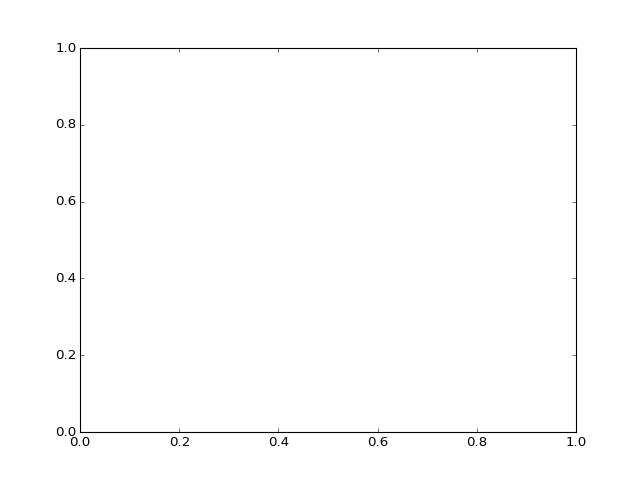

In [241]:
# ANALYZING CLASSIFIER PERFOMANCE 
# PRECISION-RECALL

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# set our data
select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]

test_clsf=['KNeighborsClassifier_k1','KNeighborsClassifier_k5','KNeighborsClassifier_k10',
              'KNeighborsClassifier_k15','KNeighborsClassifier_k20',
              'KNeighborsClassifier_k30','KNeighborsClassifier_k50','SVC_C1_rbf','SVC_C0025_linear',
              'SVC_C1_linear','SVC_C2_linear', 'SVC_d2_poly','SVC_d3_poly','SVC_sigmoid',
              'RandomForest_1','RandomForest_3','RandomForest_5','RandomForest_10', 'RandomForest_20','RandomForest_30']
recalls=[]
precisions=[]
average_precisions=[]
for clsf in test_clsf:
    detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                        scale_fraction=0.0625, 
                                                        overlap_threshold_original=0.6,
                                                        orientations=9, pixels_per_cell=(32, 32), 
                                                        cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                        overlap_threshold_nms=0.6,
                                                        clasfr=clsf)
    recall, precision,average_precision =detector.classifier_performance(train_images, train_boxes, test_images, test_boxes, debug=True)
    recalls.append(recall)
    precisions.append(precision)
    average_precisions.append(average_precision)





<IPython.core.display.Javascript object>


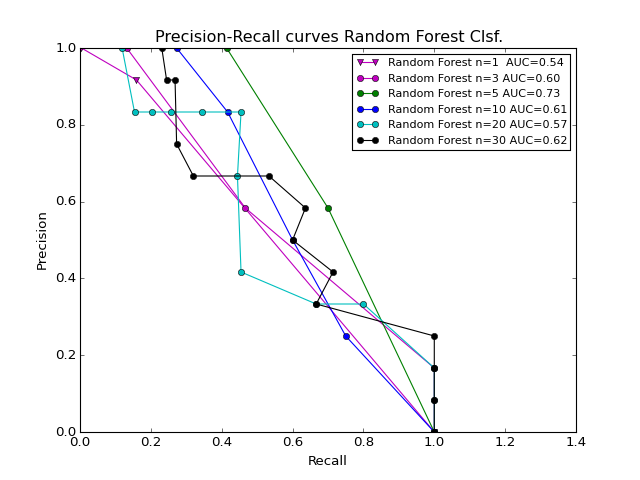

In [255]:
fig, axs = plt.subplots()

plot=2
# Plot Precision-Recall curve
plt.clf()
if plot==0:
    plt.plot(recalls[0], precisions[0], 'm-o', label='K Neighbors k=1 AUC={0:0.2f}'.format(average_precisions[0]))
    plt.plot(recalls[1], precisions[1], 'g-o', label='K Neighbors k=5 AUC={0:0.2f}'.format(average_precisions[1]))
    plt.plot(recalls[2], precisions[2], 'b-o',label='K Neighbors k=10 AUC={0:0.2f}'.format(average_precisions[2]))
    plt.plot(recalls[3], precisions[3], 'k-o',label='K Neighbors k=15 AUC={0:0.2f}'.format(average_precisions[3]))
    plt.plot(recalls[4], precisions[4], 'c-o',label='K Neighbors k=20 AUC={0:0.2f}'.format(average_precisions[4]))
    plt.plot(recalls[5], precisions[5], 'r-o',label='K Neighbors k=30 AUC={0:0.2f}'.format(average_precisions[5]))
    plt.plot(recalls[6], precisions[6], 'm-v',label='K Neighbors k=50 AUC={0:0.2f}'.format(average_precisions[6]))

if plot==1:
    plt.plot(recalls[7], precisions[7], 'g-v',label='SVC C=1 rbf AUC={0:0.2f}'.format(average_precisions[7]))
    plt.plot(recalls[8], precisions[8],'m-o', label='SVC C= 0.025 linear  AUC={0:0.2f}'.format(average_precisions[8]))
    plt.plot(recalls[9], precisions[9], 'g-o',label='SVC C= 1 linear AUC={0:0.2f}'.format(average_precisions[9]))
    plt.plot(recalls[10], precisions[10], 'b-o',label='SVC C= 2 linear AUC={0:0.2f}'.format(average_precisions[10]))
    plt.plot(recalls[11], precisions[11],'r-o', label='SVC poly d=2 AUC={0:0.2f}'.format(average_precisions[11]))
    plt.plot(recalls[12], precisions[12], 'c-o',label='SVC poly d=3 AUC={0:0.2f}'.format(average_precisions[12]))
    plt.plot(recalls[13], precisions[13],'k-o', label='SVC sigmoid AUC={0:0.2f}'.format(average_precisions[13]))

if plot==2:
    plt.plot(recalls[14], precisions[14], 'm-v',label='Random Forest n=1  AUC={0:0.2f}'.format(average_precisions[14]))
    plt.plot(recalls[15], precisions[15], 'm-o',label='Random Forest n=3 AUC={0:0.2f}'.format(average_precisions[15]))
    plt.plot(recalls[16], precisions[16], 'g-o',label='Random Forest n=5 AUC={0:0.2f}'.format(average_precisions[16]))
    plt.plot(recalls[17], precisions[17],'b-o', label='Random Forest n=10 AUC={0:0.2f}'.format(average_precisions[17]))
    plt.plot(recalls[18], precisions[18], 'c-o',label='Random Forest n=20 AUC={0:0.2f}'.format(average_precisions[18]))
    plt.plot(recalls[19], precisions[19], 'k-o',label='Random Forest n=30 AUC={0:0.2f}'.format(average_precisions[19]))


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1])
plt.xlim([0.0, 1.4])
#plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precisions[0]))
plt.title('Precision-Recall curves Random Forest Clsf.')
plt.legend(loc="upper right", prop={"size":10})
plt.show()

NameError: name 'predicted_labels' is not defined

In [17]:
# ANALYZING CLASSIFIER PERFOMANCE 
# ROC

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import sklearn.svm as svm

# Import some data to play with
iris = datasets.load_iris()
X_train = train_boxes
X_test = test_boxes
train_images
test_images

# Learn to predict each class against the other
classifier = svm.SVC(probability=True,C=0.025, kernel="linear")
#scores = classifier.fit(train_boxes).decision_function(test_boxes) # is it doing fit+pred+score at the same time?


# alternative: score give more than one score (not the mean)
#scores_prob,_= detector.score(test_images, test_boxes,predicted_boxes_prob, debug=False)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_boxes.ravel(), scores_probe.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += inteñrp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Automatically created module for IPython interactive environment


TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
import numpy as np
from sklearn import metrics
 y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr
array([ 0. ,  0.5,  0.5,  1. ])
tpr
array([ 0.5,  0.5,  1. ,  1. ])
thresholds
array([ 0.8 ,  0.4 ,  0.35,  0.1 ])